In [1]:
import numpy as np
import pandas as pd

In [4]:
dataset=pd.read_csv(r"F:\natural\daily_csv.csv")

In [5]:
dataset

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00
...,...,...
5933,2020-08-05,2.23
5934,2020-08-06,2.26
5935,2020-08-07,2.15
5936,2020-08-10,2.18


In [4]:
dataset.isnull().any()

Date     False
Price     True
dtype: bool

In [5]:
dataset.isnull().sum()

Date     0
Price    1
dtype: int64

In [6]:
dataset ["Price"].mode()

0    2.75
dtype: float64

In [7]:
 dataset ["Price"].fillna(dataset ["Price"].mean(),inplace=True)

In [8]:
 dataset.isnull().any()

Date     False
Price    False
dtype: bool

In [9]:
dataset.head()

,Date,Price
0,1997-01-07,3.82
1,1997-01-08,3.80
2,1997-01-09,3.61
3,1997-01-10,3.92
4,1997-01-13,4.00


In [10]:
dataset['year']=pd.DatetimeIndex(dataset['Date']).year

In [1]:
dataset.head()

NameError: name 'dataset' is not defined

In [12]:
dataset['month']=pd.DatetimeIndex(dataset['Date']).month

In [13]:
dataset['day']=pd.DatetimeIndex(dataset['Date']).day

In [14]:
dataset.head()

,Date,Price,year,month,day
0,1997-01-07,3.82,1997,1,7
1,1997-01-08,3.80,1997,1,8
2,1997-01-09,3.61,1997,1,9
3,1997-01-10,3.92,1997,1,10
4,1997-01-13,4.00,1997,1,13


In [15]:
dataset.drop('Date',axis=1,inplace=True)

In [16]:
dataset.head()

,Price,year,month,day
0,3.82,1997,1,7
1,3.80,1997,1,8
2,3.61,1997,1,9
3,3.92,1997,1,10
4,4.00,1997,1,13


In [17]:
x=dataset.iloc[:,1:4].values
y=dataset.iloc[:,0:1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train.shape

(4750, 3)

In [20]:
y_train.shape

(4750, 1)

In [21]:
 from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred=regressor.predict(x_test)

In [23]:
x_test

array([[2009,    9,   24],
       [2018,    9,   21],
       [2008,    9,    3],
       ...,
       [2012,    3,   27],
       [2009,    6,   22],
       [2003,   11,   19]], dtype=int64)

In [24]:
y_test

array([[3.56],
       [3.02],
       [7.26],
       ...,
       [2.09],
       [4.01],
       [4.46]])

In [25]:
y_pred

array([[4.15895695],
       [3.66216558],
       [4.17842349],
       ...,
       [3.96917871],
       [4.14016655],
       [4.48872013]])

In [26]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)

In [27]:
accuracy

0.028329691883523966

In [28]:
yp=regressor.predict([[1997,1,8]])

In [29]:
yp

array([[4.74667161]])

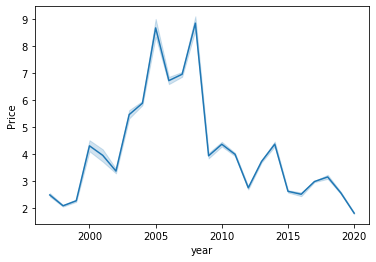

In [30]:
import seaborn as sns
sns.lineplot(x="year",y="Price",data=dataset)

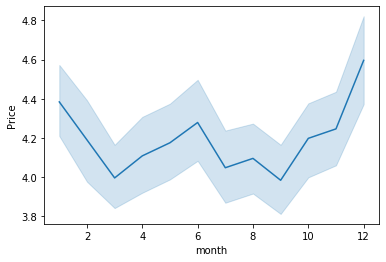

In [31]:
sns.lineplot(x="month",y="Price",data=dataset)

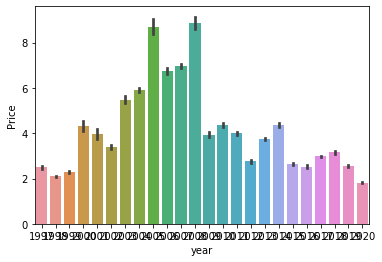

In [32]:
sns.barplot(x="year",y="Price",data=dataset)

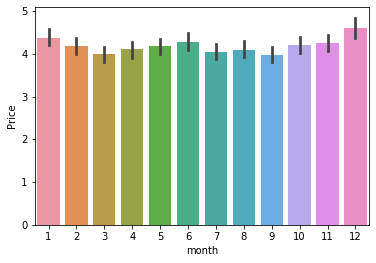

In [33]:
sns.barplot(x="month",y="Price",data=dataset)

In [ ]:
import pickle
pickle.dump(regressor,open('price.pkl','wb'))
model = pickle.load(open('price.pkl','rb'))